# 시각화

In [2]:
# 한글 폰트 설치
!apt-get install -y fonts-nanum
!fc-cache -fv
!rm ~/.cache/matplotlib -rf
# 설치 후 colab 경우 Reuntime > Restart session 필요

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 0 not upgraded.
Font directories:
	/root/.local/share/fonts
	/usr/local/share/fonts
	/usr/share/fonts
	/root/.fonts
	/usr/share/fonts/truetype
	/usr/share/fonts/truetype/dejavu
	/usr/share/fonts/truetype/nanum
/root/.local/share/fonts: skipping, no such directory
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 2 dirs
/usr/share/fonts/truetype/dejavu: caching, new cache contents: 22 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/dejavu: skipping, looped directory detecte

In [3]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt
mpl.rc('font', family='NanumBarunGothic') # 혹은 다른 설치한 Nanum 폰트 사용

# 데이터 전처리

## 관광여행횟수_성별_연령_여행지활동(2018-2022) = gender_age_travelActivities(2020-2022)

### 1. 년도별 전체(소계) 비교 - 2020, 2021, 2022년도 합계
### 2. 3년도는 합치고 남여 비교
### 3. 3년도는 합치고 나이대별 비교
### 4. 3년도는 합치고 항목별 비교

In [4]:
import numpy as np
import pandas as pd
import pymongo
client=pymongo.MongoClient("192.168.10.240",27017)
db= client['AI_LKJ']
collection=db['gender_age_travelActivities(2020-2022)']
data = collection.find()
df_gender_age_travelActivities = pd.DataFrame(data)
df_gender_age_travelActivities

,_id,classification,values,year,month,visitor_percent
0,662619a0db3227b4f2b26605,전체,소계,2020,자연 및 풍경감상,78.1
1,662619a0db3227b4f2b26606,전체,소계,2020,음식관광(지역 맛집 등),53.9
2,662619a0db3227b4f2b26607,전체,소계,2020,휴식/휴양,57.6
3,662619a0db3227b4f2b26608,전체,소계,2020,가족/친지/친구 방문,16.3
4,662619a0db3227b4f2b26609,전체,소계,2020,역사 유적지 방문,8.5
...,...,...,...,...,...,...
625,662619a0db3227b4f2b26876,연령,70대 이상,2022,회의참가/시찰,0.4
626,662619a0db3227b4f2b26877,연령,70대 이상,2022,교육/훈련/연수,0.2
627,662619a0db3227b4f2b26878,연령,70대 이상,2022,스포츠 경기관람,-
628,662619a0db3227b4f2b26879,연령,70대 이상,2022,카지노 경마 경륜 등,0.1


In [5]:
# 결측치와 이상치 확인     -> 없음 확인
df_gender_age_travelActivities.isnull().sum()

_id                0
classification     0
values             0
year               0
month              0
visitor_percent    0
dtype: int64

In [6]:
# 전체적인 컬럼 확인
df_gender_age_travelActivities.columns

Index(['_id', 'classification', 'values', 'year', 'month', 'visitor_percent'], dtype='object')

In [7]:
# 년도별 전체(소계) 비교 - 2020, 2021, 2022년도 합계
df_gender_age_month_totalsum = df_gender_age_travelActivities[df_gender_age_travelActivities['classification'] == '전체'].sort_values('visitor_percent', ascending=False)

In [8]:
## 년도별 전체(소계) 비교 - 2020, 2021, 2022년도 합계
pd.pivot_table(data=df_gender_age_month_totalsum,index='year',values='visitor_percent',aggfunc='mean')

,visitor_percent
year,
2020,12.385714
2021,12.961905
2022,12.833333


In [9]:
# 3년도는 합치고 남여 비교
df_gender_age_travelActivitiesgendercompare = df_gender_age_travelActivities[df_gender_age_travelActivities['classification'] == '성별'].sort_values('visitor_percent', ascending=False)

In [10]:
## 3년도는 합치고 남여 비교
pd.pivot_table(data=df_gender_age_travelActivitiesgendercompare,index='values',values='visitor_percent',aggfunc='mean')

,visitor_percent
values,
남자,12.573016
여자,12.871429


In [14]:
# 3년도는 합치고 나이대별 비교
df_gender_age_travelActivities = df_gender_age_travelActivities.replace('-',0)
df_gender_age_travelActivities.query("classification=='연령'").sort_values('visitor_percent', ascending=False)
# df_gender_age_travelActivities_agecompare = df_gender_age_travelActivities[df_gender_age_travelActivities['classification'] == '연령'].sort_values('visitor_percent', ascending=False)

,_id,classification,values,year,month,visitor_percent
462,662619a0db3227b4f2b267d3,연령,50대,2021,자연 및 풍경감상,83.5
483,662619a0db3227b4f2b267e8,연령,50대,2022,자연 및 풍경감상,83.1
399,662619a0db3227b4f2b26794,연령,40대,2021,자연 및 풍경감상,82.7
420,662619a0db3227b4f2b267a9,연령,40대,2022,자연 및 풍경감상,82.0
546,662619a0db3227b4f2b26827,연령,60대,2022,자연 및 풍경감상,81.9
...,...,...,...,...,...,...
607,662619a0db3227b4f2b26864,연령,70대 이상,2021,카지노 경마 경륜 등,0.0
228,662619a0db3227b4f2b266e9,연령,15~19세,2021,스포츠 경기관람,0.0
207,662619a0db3227b4f2b266d4,연령,15~19세,2020,스포츠 경기관람,0.0
627,662619a0db3227b4f2b26878,연령,70대 이상,2022,스포츠 경기관람,0.0


In [15]:
df_age_acitivities=df_gender_age_travelActivities.query("classification=='연령'")
df_age_acitivities

,_id,classification,values,year,month,visitor_percent
189,662619a0db3227b4f2b266c2,연령,15~19세,2020,자연 및 풍경감상,66.3
190,662619a0db3227b4f2b266c3,연령,15~19세,2020,음식관광(지역 맛집 등),51.1
191,662619a0db3227b4f2b266c4,연령,15~19세,2020,휴식/휴양,52.3
192,662619a0db3227b4f2b266c5,연령,15~19세,2020,가족/친지/친구 방문,20.8
193,662619a0db3227b4f2b266c6,연령,15~19세,2020,역사 유적지 방문,8.8
...,...,...,...,...,...,...
625,662619a0db3227b4f2b26876,연령,70대 이상,2022,회의참가/시찰,0.4
626,662619a0db3227b4f2b26877,연령,70대 이상,2022,교육/훈련/연수,0.2
627,662619a0db3227b4f2b26878,연령,70대 이상,2022,스포츠 경기관람,0.0
628,662619a0db3227b4f2b26879,연령,70대 이상,2022,카지노 경마 경륜 등,0.1


In [16]:
df_age_acitivities['month'].unique()

array(['자연 및 풍경감상', '음식관광(지역 맛집 등)', '휴식/휴양', '가족/친지/친구 방문', '역사 유적지 방문',
       '테마파크 놀이시설 동/식물원 방문', '시티투어', '쇼핑', '드라마 촬영지 방문',
       '야외 위락 및 스포츠 레포츠 활동', '지역 문화예술/공연/전시시설 관람', '종교/성지순례',
       '지역 축제/이벤트 참가', '교육/체험 프로그램 참가', '온천/스파', '유흥/오락', '회의참가/시찰',
       '교육/훈련/연수', '스포츠 경기관람', '카지노 경마 경륜 등', '기타'], dtype=object)

## 여행 테마별 관광객 비율
- 자연 및 풍경 감상, 음식관광, 휴식/휴양 순으로 많이 차지

In [63]:
pivot_acitivities = pd.pivot_table(data=df_age_acitivities, index='month',values='visitor_percent',aggfunc='mean')
pivot_acitivities=pivot_acitivities.sort_values('visitor_percent',ascending=False)

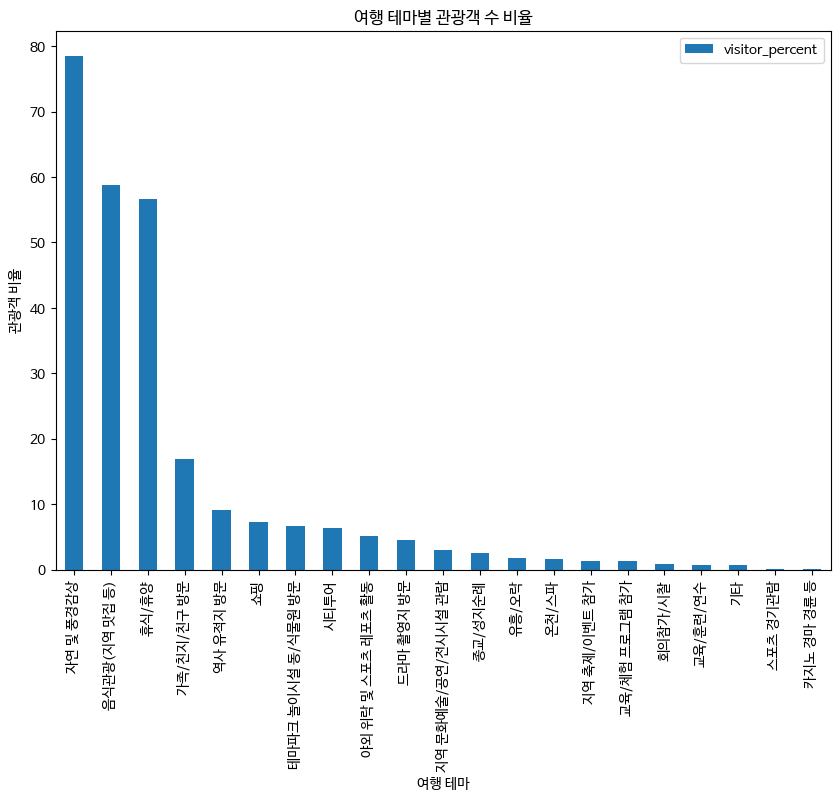

In [64]:
pivot_acitivities = pd.pivot_table(data=df_age_acitivities, index='month',values='visitor_percent',aggfunc='mean')
pivot_acitivities=pivot_acitivities.sort_values('visitor_percent',ascending=False)
# 선 그래프 그리기
# concept 값이 0인 행 제거
pivot_acitivities.plot(kind='bar', figsize=(10, 7))

# 그래프 제목, x축 레이블, y축 레이블 설정
plt.title('여행 테마별 관광객 수 비율')
plt.xlabel('여행 테마')
plt.ylabel('관광객 비율')
plt.xticks(rotation=90)

# 그래프 표시
plt.show()

## 연령대, 여행 테마별 관광객 비율
- 30,40대의 경우에만 휴식/휴양이 음식관광보다 더 많이 차지함

In [39]:
pivot_age_acitivities = pd.pivot_table(data=df_age_acitivities, index='values',columns='month',values='visitor_percent',aggfunc='mean')
pivot_age_acitivities

month,가족/친지/친구 방문,교육/체험 프로그램 참가,교육/훈련/연수,기타,드라마 촬영지 방문,쇼핑,스포츠 경기관람,시티투어,야외 위락 및 스포츠 레포츠 활동,역사 유적지 방문,...,유흥/오락,음식관광(지역 맛집 등),자연 및 풍경감상,종교/성지순례,지역 문화예술/공연/전시시설 관람,지역 축제/이벤트 참가,카지노 경마 경륜 등,테마파크 놀이시설 동/식물원 방문,회의참가/시찰,휴식/휴양
values,,,,,,,,,,,,,,,,,,,,,
15~19세,19.800000,1.766667,0.733333,0.800000,4.666667,9.766667,0.033333,7.700000,5.333333,8.900000,...,2.700000,56.466667,69.000000,1.200000,4.766667,1.166667,0.100000,10.566667,0.033333,52.233333
20대,9.833333,1.033333,0.433333,0.566667,5.466667,8.766667,0.100000,8.866667,5.966667,8.466667,...,3.466667,60.900000,78.866667,1.200000,3.566667,1.366667,0.033333,8.666667,0.533333,59.333333
30대,12.133333,2.333333,1.300000,0.466667,5.233333,7.333333,0.133333,7.266667,5.266667,8.766667,...,1.933333,58.366667,80.900000,1.666667,3.333333,1.500000,0.100000,9.266667,1.600000,61.500000
40대,16.266667,1.633333,1.233333,0.600000,4.600000,6.700000,0.066667,5.800000,5.400000,9.966667,...,1.033333,59.166667,81.366667,2.566667,3.033333,1.466667,0.066667,7.366667,1.366667,60.533333
50대,17.133333,1.033333,1.000000,0.666667,3.766667,6.466667,0.100000,5.900000,6.400000,9.466667,...,1.000000,58.200000,81.566667,3.366667,2.500000,1.100000,0.066667,4.433333,1.266667,57.633333
60대,18.733333,0.900000,0.500000,0.833333,3.800000,5.733333,0.133333,5.000000,4.833333,9.433333,...,1.166667,59.200000,80.266667,3.666667,1.866667,1.400000,0.166667,3.300000,1.066667,55.766667
70대 이상,24.966667,0.433333,0.233333,1.200000,3.833333,6.200000,0.033333,4.200000,3.266667,8.733333,...,0.833333,59.233333,77.033333,4.166667,2.333333,1.233333,0.033333,2.666667,0.533333,49.566667


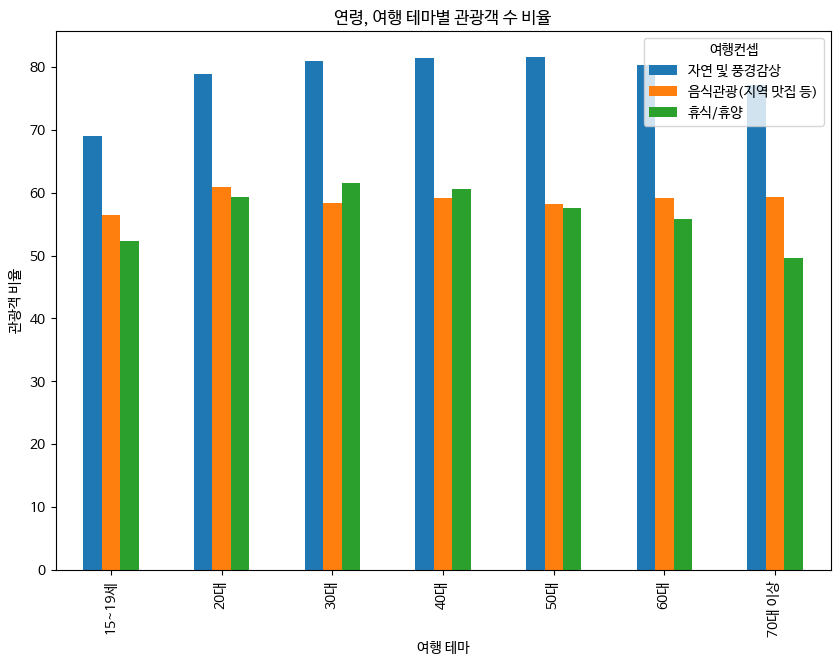

In [41]:
pivot_age_acitivities = pd.pivot_table(data=df_age_acitivities, index='values',columns='month',values='visitor_percent',aggfunc='mean')
pivot_age_acitivities=pivot_age_acitivities.loc[:,['자연 및 풍경감상','음식관광(지역 맛집 등)','휴식/휴양']]
pivot_age_acitivities# 선 그래프 그리기
# concept 값이 0인 행 제거
ax = pivot_age_acitivities.plot(kind='bar', figsize=(10, 7))

# 그래프 제목, x축 레이블, y축 레이블 설정
plt.title('연령, 여행 테마별 관광객 수 비율')
plt.xlabel('여행 테마')
plt.ylabel('관광객 비율')
ax.legend(title="여행컨셉", loc='upper right')

# 그래프 표시
plt.show()

In [42]:
df_gender_acitivities=df_gender_age_travelActivities.query("classification=='성별'")
df_gender_acitivities

,_id,classification,values,year,month,visitor_percent
63,662619a0db3227b4f2b26644,성별,남자,2020,자연 및 풍경감상,77.1
64,662619a0db3227b4f2b26645,성별,남자,2020,음식관광(지역 맛집 등),52.6
65,662619a0db3227b4f2b26646,성별,남자,2020,휴식/휴양,56.8
66,662619a0db3227b4f2b26647,성별,남자,2020,가족/친지/친구 방문,15.7
67,662619a0db3227b4f2b26648,성별,남자,2020,역사 유적지 방문,8.3
...,...,...,...,...,...,...
184,662619a0db3227b4f2b266bd,성별,여자,2022,회의참가/시찰,0.4
185,662619a0db3227b4f2b266be,성별,여자,2022,교육/훈련/연수,0.3
186,662619a0db3227b4f2b266bf,성별,여자,2022,스포츠 경기관람,0.1
187,662619a0db3227b4f2b266c0,성별,여자,2022,카지노 경마 경륜 등,0.0


## 성별, 여행 테마별 관광객 비율
- 전체적으로 비슷하지만 여성이 좀 더 높음

In [49]:
pivot_gender_acitivities = pd.pivot_table(data=df_gender_acitivities, index='month',columns='values',values='visitor_percent',aggfunc='mean')
pivot_gender_acitivities

values,남자,여자
month,,
가족/친지/친구 방문,14.566667,15.600000
교육/체험 프로그램 참가,1.600000,1.233333
교육/훈련/연수,1.466667,0.366667
기타,0.800000,0.533333
드라마 촬영지 방문,4.533333,4.700000
쇼핑,6.100000,8.166667
스포츠 경기관람,0.100000,0.100000
시티투어,6.133333,7.133333
야외 위락 및 스포츠 레포츠 활동,7.100000,3.966667


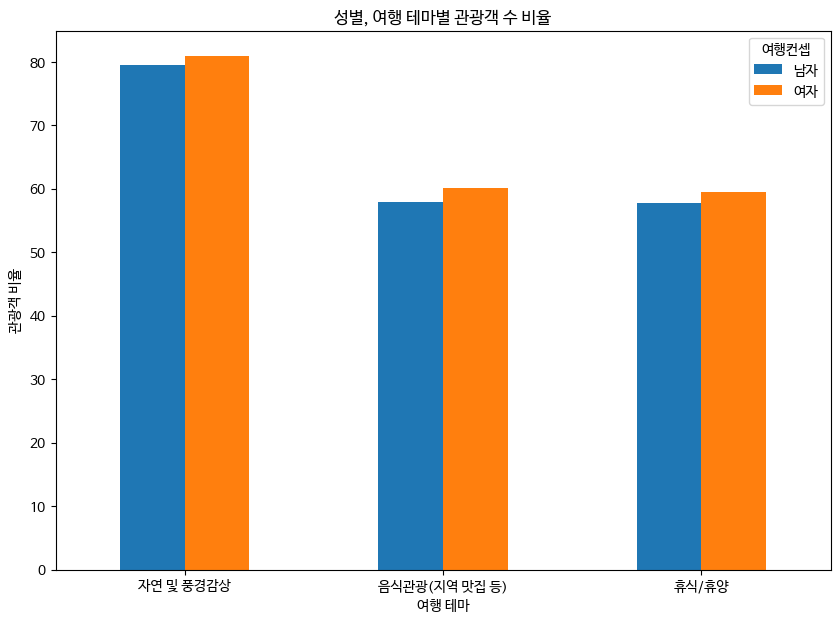

In [55]:
pivot_gender_acitivities = pd.pivot_table(data=df_gender_acitivities, index='month',columns='values',values='visitor_percent',aggfunc='mean')
pivot_gender_acitivities=pivot_gender_acitivities.loc[['자연 및 풍경감상','음식관광(지역 맛집 등)','휴식/휴양']]
pivot_gender_acitivities# 선 그래프 그리기
# concept 값이 0인 행 제거
ax = pivot_gender_acitivities.plot(kind='bar', figsize=(10, 7))

# 그래프 제목, x축 레이블, y축 레이블 설정
plt.title('성별, 여행 테마별 관광객 수 비율')
plt.xlabel('여행 테마')
plt.ylabel('관광객 비율')
ax.legend(title="여행컨셉", loc='upper right')
plt.xticks(rotation=0)
# 그래프 표시
plt.show()